In [35]:
f = open("input.txt",'r')
docs = f.read().split("\n")



In [36]:
import pandas as pd

In [37]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

stopwords_eng = stopwords.words("english")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gokul_08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gokul_08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
#tokenizing

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


ps= PorterStemmer()
corrected_doc = []
pun = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

for doc in docs:
    token = word_tokenize(doc)
    temp = ""
    for i in token:
        if i not in stopwords_eng:
            if i in pun:
                i = i.replace(i, " ")
            temp += ps.stem(i) + " "
    corrected_doc.append(temp.lower())
    
    
print(corrected_doc)


        

["ukrain condemn russia 's 'humili death   tweet prison attack ", 'there differ russian diplomat call execut ukrainian prison war russian troop ', 'they accomplic war crime must held account   ', 'fighter evacu mariupol steelwork arriv russian-held town ', "joe biden test posit covid 'rebound   infect ", 'the 79-year-old first contract viru 21 juli   reveal experienc mild symptom   ', "us presid joe biden test posit covid-19   describ `` rebound '' infect doctor   ", 'darwin nunez seal game victori liverpool land first blow season champion manchest citi win commun ', 'red full-back trent alexander-arnold score open goal curl effort edg box took ', "england 's lioness stand game women 's footbal histori take germani footbal championship final ", 'way germani   competit eight time   they beat england 6-2 final footbal ', 'in space 24 hour hungari weekend   formula 1 race game turn upsid   ', "merced race gamewer ahead qualifi king 2022   ferrari   and world championship leader max versta

In [39]:
df = pd.DataFrame (corrected_doc, columns = ['Keywords'])

In [40]:
df

,Keywords
0,ukrain condemn russia 's 'humili death tweet...
1,there differ russian diplomat call execut ukra...
2,they accomplic war crime must held account
3,fighter evacu mariupol steelwork arriv russian...
4,joe biden test posit covid 'rebound infect
...,...
102,
103,
104,
105,


In [41]:
#vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
sample = vectorizer.fit_transform(df['Keywords'])



In [42]:
#KMeans Clustering

from sklearn.cluster import KMeans


K=3

model = KMeans(n_clusters = K)#, init='k-means++', max_iter=100, n_init=1)
model.fit(sample)

out = model.labels_

print(out)


[0 0 0 0 0 2 0 0 1 0 0 1 1 0 1 1 0 2 0 1 2 0 0 0 0 0 0 0 2 0 2 2 2 0 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 2 0 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0]


In [60]:
df['Cluster type'] = out

df[5:]

,Keywords,Cluster type,X0,X1
5,the 79-year-old first contract viru 21 juli ...,2,-0.001863,-0.011226
6,us presid joe biden test posit covid-19 desc...,0,0.598093,0.154893
7,darwin nunez seal game victori liverpool land ...,0,-0.075496,-0.126256
8,red full-back trent alexander-arnold score ope...,1,-0.061461,-0.049317
9,england 's lioness stand game women 's footbal...,0,-0.092791,-0.122288
...,...,...,...,...
102,,0,-0.013892,-0.009038
103,,0,-0.013892,-0.009038
104,,0,-0.013892,-0.009038
105,,0,-0.013892,-0.009038


In [58]:
def keywords(n):
    
    df = pd.DataFrame(sample.todense()).groupby(out).mean() 
    terms = vectorizer.get_feature_names()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
get_top_keywords(10)


Cluster 0
moderna,posit,first,pfizer,two,test,dose,peopl,vaccin,covid

Cluster 1
season,said,car,bull,world,verstappen,max,ferrari,red,race

Cluster 2
commit,prime,patient,estim,minist,govern,bill,eu,uk,the


/Users/gokul_08/Coventry_DS/Softwares/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
Y = vectorizer.transform(["Pfizer second dose has been approved by UK"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["US President Joe Biden is the most influencial person in the world currently"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Ferrari converted second and third places on the grid into fourth and sixth at the flag and put their title contender Charles Leclerc on a strategy that left their rivals - and Leclerc himself - puzzled."])
prediction = model.predict(Y)
print(prediction)

[0]
[2]
[1]


In [50]:
#testing

test_doc = ["Prime minister Russia's in the war and goverment will withdraw all bills passed in eu",
                          "Joe Biden tests positive for Covid infection and gets vaccinated",
            "Ferrari converted second and third places on the grid into fourth and sixth at the flag and put their title contender Charles Leclerc on a strategy that left their rivals - and Leclerc himself - puzzled."
           ]



corrected_test_doc = []

for doc in test_doc:
    token = word_tokenize(doc)
    temp = ""
    for i in token:
        if i not in stopwords_eng:
            temp += ps.stem(i) + " "
    corrected_test_doc.append(temp)

#print(corrected_doc)

Y = vectorizer.transform([corrected_test_doc[0]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([corrected_test_doc[1]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([corrected_test_doc[2]])
prediction = model.predict(Y)
print(prediction)

[2]
[0]
[1]


In [53]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(sample.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


df['X0'] = x0
df['X1'] = x1

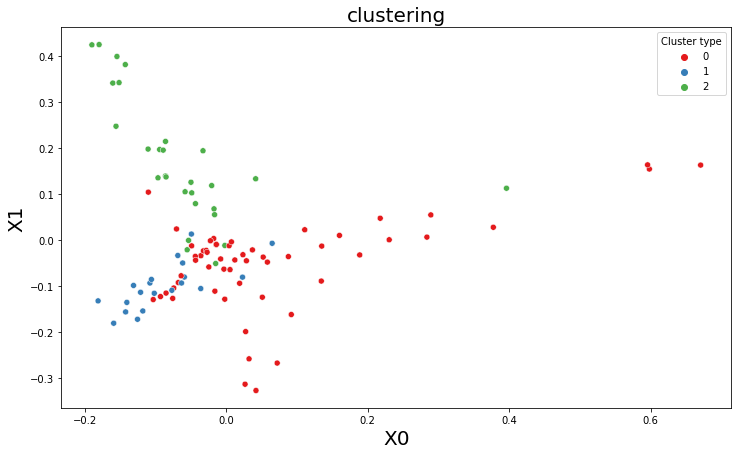

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("clustering", fontdict={"fontsize": 20})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 20})
plt.ylabel("X1", fontdict={"fontsize": 20})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='X0', y='X1', hue='Cluster type', palette="Set1")
plt.show()

[pca] >Input data is a sparse matrix. Method is set to: [trunc_svd].
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [700] columns of the input dataframe.
[pca] >Fit using Truncated SVD.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


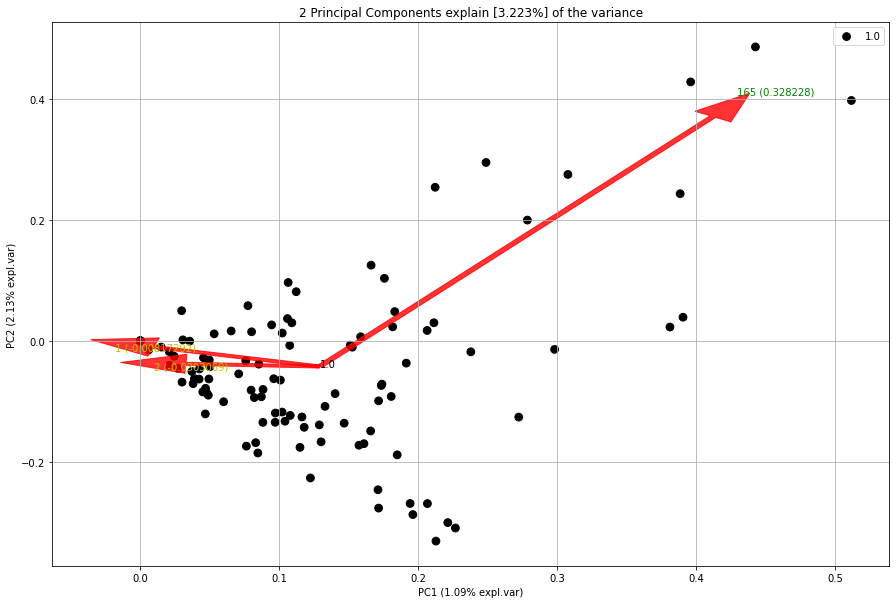

In [57]:
from pca import pca


model1 = pca(n_components=0.95)

model1 = pca(n_components=2)

results = model1.fit_transform(sample)


fig, ax = model1.biplot(n_feat=3)